# 1D Simple Harmonic Oscillator

## Imports

In [12]:
from IPython.display import display, display_pretty

In [5]:
from sympy import init_printing
init_printing(use_latex=True)

In [6]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.sho1d import *
from sympy.physics.quantum.tests.test_sho1d import *

## Printing Of Operators

Create a raising and lowering operator and make sure they print correctly

In [7]:
ad = RaisingOp('a')
ad

In [8]:
a = LoweringOp('a')
a

In [10]:
print(latex(ad))
print(latex(a))

a^{\dag}
a


In [13]:
display_pretty(ad)
display_pretty(a)

 †
a 

a

In [15]:
print(srepr(ad))
print(srepr(a))

RaisingOp(Symbol('a'))
LoweringOp(Symbol('a'))


In [16]:
print(repr(ad))
print(repr(a))

RaisingOp(a)
a


## Printing of States

Create a simple harmonic state and check its printing

In [17]:
k = SHOKet('k')
k

In [18]:
b = SHOBra('b')
b

In [19]:
print(pretty(k))
print(pretty(b))

❘k⟩
⟨b❘


In [20]:
print(latex(k))
print(latex(b))

{\left|k\right\rangle }
{\left\langle b\right|}


In [21]:
print(srepr(k))
print(srepr(b))

SHOKet(Symbol('k'))
SHOBra(Symbol('b'))


## Properties

Take the dagger of the raising and lowering operators. They should return each other:

In [22]:
Dagger(ad)

In [23]:
Dagger(a)

Check commutators of the raising and lowering operators

In [24]:
Commutator(ad,a).doit()

In [25]:
Commutator(a,ad).doit()

Take a look at the dual states of the bra and ket

In [26]:
k.dual

In [27]:
b.dual

Taking the inner product of the bra and ket will return the Kronecker delta function

In [29]:
InnerProduct(b,k).doit()

Take a look at how the raising and lowering operators act on states. We use qapply to apply an operator to a state

In [30]:
qapply(ad*k)

In [31]:
qapply(a*k)

But the states may have an explicit energy level. Let's look at the ground and first excited states

In [32]:
kg = SHOKet(0)
kf = SHOKet(1)

In [33]:
qapply(ad*kg)

In [34]:
qapply(ad*kf)

In [35]:
qapply(a*kg)

In [36]:
qapply(a*kf)

## Number operator and Hamiltonian

Let's look at the number operator and Hamiltonian operator:

In [38]:
k = SHOKet('k')
ad = RaisingOp('a')
a = LoweringOp('a')
N = NumberOp('N')
H = Hamiltonian('H')

The number operator is simply expressed as `ad*a`:

In [40]:
N.rewrite('a').doit()

The number operator expressed in terms of the position and momentum operators:

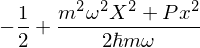

In [41]:
N.rewrite('xp').doit()

It can also be expressed in terms of the Hamiltonian operator:

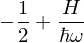

In [42]:
N.rewrite('H').doit()

The Hamiltonian operator can be expressed in terms of the raising and lowering operators, position and momentum operators, and the number operator:

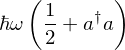

In [43]:
H.rewrite('a').doit()

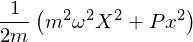

In [44]:
H.rewrite('xp').doit()

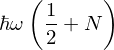

In [45]:
H.rewrite('N').doit()

The raising and lowering operators can also be expressed in terms of the position and momentum operators

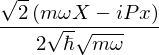

In [46]:
ad.rewrite('xp').doit()

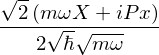

In [47]:
a.rewrite('xp').doit()

### Properties

Let's take a look at how the number operator and Hamiltonian act on states:

In [48]:
qapply(N*k)

Apply the number operator to a state returns the state times the ket:

In [49]:
ks = SHOKet(2)
qapply(N*ks)

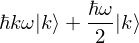

In [50]:
qapply(H*k)

Let's see how the operators commute with each other:

In [51]:
Commutator(N,ad).doit()

In [52]:
Commutator(N,a).doit()

In [53]:
Commutator(N,H).doit()

## Representation

We can express the operators in number operator basis. There are different ways to create a matrix in Python, we will use 3 different ways.

Sympy:

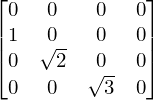

In [54]:
represent(ad, basis=N, ndim=4, format='sympy')

Numpy:

In [55]:
represent(ad, basis=N, ndim=5, format='numpy')

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.41421356,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.73205081,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  2.        ,  0.        ]])

`scipy.sparse`:

In [58]:
sparse_rep = represent(ad, basis=N, ndim=4, format='scipy.sparse', spmatrix='lil')
sparse_rep

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [59]:
print(sparse_rep)

  (1, 0)	1.0
  (2, 1)	1.41421356237
  (3, 2)	1.73205080757


The same can be done for the other operators

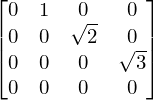

In [60]:
represent(a, basis=N, ndim=4, format='sympy')

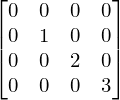

In [61]:
represent(N, basis=N, ndim=4, format='sympy')

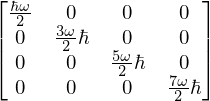

In [62]:
represent(H, basis=N, ndim=4, format='sympy')

Bras and kets can also be represented:

In [63]:
k0 = SHOKet(0)
k1 = SHOKet(1)
b0 = SHOBra(0)
b1 = SHOBra(1)

In [64]:
represent(k0, basis=N, ndim=5, format='sympy')

In [65]:
represent(k1, basis=N, ndim=5, format='sympy')

In [66]:
represent(b0, basis=N, ndim=5, format='sympy')

In [67]:
represent(b1, basis=N, ndim=5, format='sympy')